In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

num_symbols = 1000

# Definition for functions for generating signals of different modulation types
## TODO: 16QAM, 64QAM, PAM4

In [2]:

def bpskgenerate():
    # BPSK signal generation
    bpsk_int = np.random.randint(0, 2, num_symbols)
    bpsk_degrees = bpsk_int*360/2.0 
    bpsk_radians = bpsk_degrees*np.pi/180.0
    bpsk_symbols = np.cos(bpsk_radians) + 1j*np.sin(bpsk_radians)

    # Adding AWGN
    n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2)
    noise_power = 0.01
    bpsk_symbols = bpsk_symbols + n * np.sqrt(noise_power)
    
    bpskdf = pd.DataFrame(bpsk_symbols, columns=['Datapoints'])
    # Plot the diagram
    # plt.plot(np.real(bpsk_symbols), np.imag(bpsk_symbols), '.')
    # plt.grid(True)
    # plt.show()
    
    return bpsk_symbols, bpskdf

def qpskgenerate():
    # QPSK signal generation
    qpsk_int = np.random.randint(0, 4, num_symbols)
    qpsk_degrees = qpsk_int*360/4.0 + 45 
    qpsk_radians = qpsk_degrees*np.pi/180.0
    qpsk_symbols = np.cos(qpsk_radians) + 1j*np.sin(qpsk_radians)

    # Adding AWGN
    n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2)
    noise_power = 0.01
    qpsk_symbols = qpsk_symbols + n * np.sqrt(noise_power)

    # Plot the diagram
    # plt.plot(np.real(qpsk_symbols), np.imag(qpsk_symbols), '.')
    # plt.grid(True)
    # plt.show()

    qpskdf = pd.DataFrame(qpsk_symbols, columns=['Datapoints'])
    
    return qpsk_symbols, qpskdf

def eightpskgenerate():
    # 8PSK signal generation
    eightpsk_int = np.random.randint(0, 8, num_symbols)
    eightpsk_degrees = eightpsk_int*360/8.0 + 30
    eightpsk_radians = eightpsk_degrees*np.pi/180.0
    epsk_symbols = np.cos(eightpsk_radians) + 1j*np.sin(eightpsk_radians)

    # Adding AWGN
    n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2)
    noise_power = 0.01
    epsk_symbols = epsk_symbols + n * np.sqrt(noise_power)
    
    epskdf = pd.DataFrame(epsk_symbols, columns=['Datapoints'])

    # # Plot the diagram
    # plt.plot(np.real(eightpsk_symbols), np.imag(eightpsk_symbols), '.')
    # plt.grid(True)
    # plt.show()
    
    return epsk_symbols, epskdf


# ASk generation

In [1]:
def askgenerate():
    # BPSK signal generation
    ask_int = np.random.randint(0, 2, num_symbols)
    ask_degrees = ask_int*360/2.0 
    ask_radians = ask_degrees*np.pi/180.0
    ask_symbols = np.cos(ask_radians) + np.sin(ask_radians)
    ask_realno = np.random.rand(num_symbols)
    ask_symbols = ask_symbols * ask_realno

    # Adding AWGN
    n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2)
    noise_power = 0.01
    ask_symbols = ask_symbols + n * np.sqrt(noise_power)
    
    askdf = pd.DataFrame(ask_symbols, columns=['Datapoints'])
    # Plot the diagram
    # plt.plot(np.real(ask_symbols), np.imag(ask_symbols), '.')
    # plt.grid(True)
    # plt.show()

    return ask_symbols, askdf


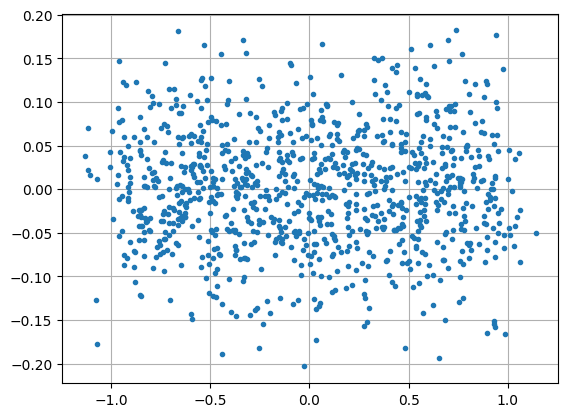

In [54]:
bpsk_symbols, bpskdf = bpskgenerate()
qpsk_symbols, qpskdf = qpskgenerate()
epsk_symbols, epskdf = eightpskgenerate()
ask_symbols, askdf = askgenerate()

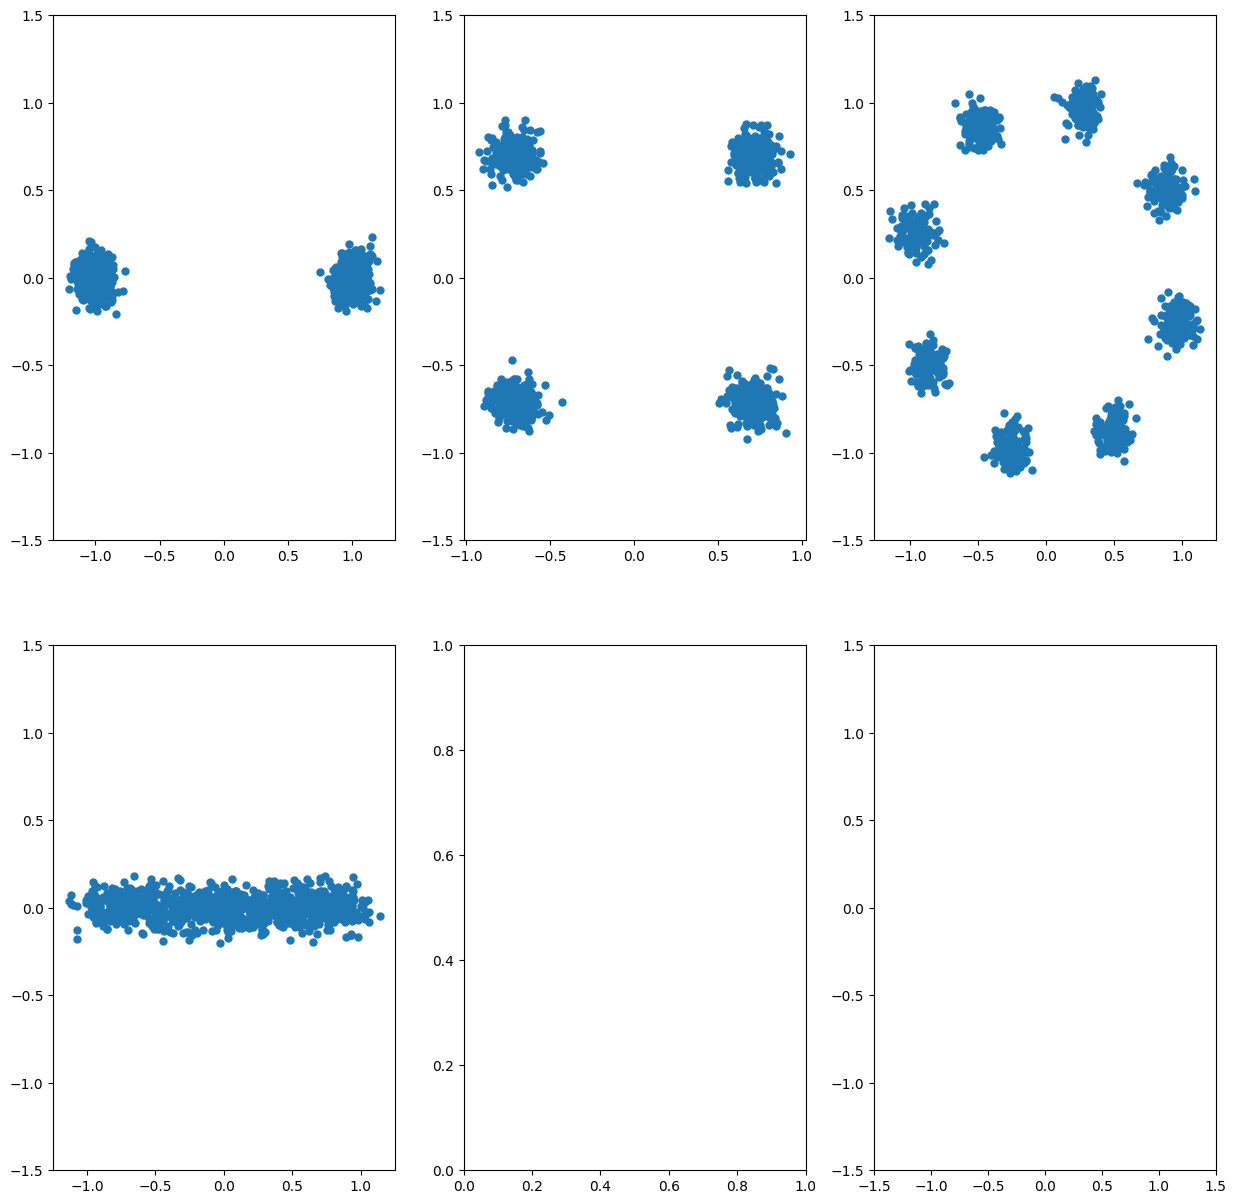

In [73]:
#Plot graphs
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes[0, 0].plot(np.real(bpsk_symbols), np.imag(bpsk_symbols), '.', markersize = 10)
axes[0, 1].plot(np.real(qpsk_symbols), np.imag(qpsk_symbols), '.', markersize = 10)
axes[0, 2].plot(np.real(epsk_symbols), np.imag(epsk_symbols), '.', markersize = 10)
axes[1, 0].plot(np.real(ask_symbols), np.imag(ask_symbols), '.', markersize = 10)

axes[0, 0].set_ylim([-1.5, 1.5])
axes[0, 1].set_ylim([-1.5, 1.5])
axes[0, 2].set_ylim([-1.5, 1.5])
axes[1, 0].set_ylim([-1.5, 1.5])

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()


In [76]:
traindf = pd.DataFrame(columns= ['Data', 'ModulationType'])
number = 0

for df in [bpskdf, qpskdf, epskdf, askdf]:
    for value in df['Datapoints']:
        if number <= 999:
            modtype = 'BPSK'
        elif 1000 <= number <= 1999:
            modtype = 'QPSK'
        elif 2000 <= number <= 2999:
            modtype = '8PSK'
        elif 3000 <= number <= 3999:
            modtype = 'ASK'
        traindf.loc[number] = [value, modtype]
        number += 1
    

In [77]:
magnitudelist = []

for data in traindf['Data']:
    magnitude = np.abs(data)
    magnitudelist.append(magnitude)
    
traindf['Magnitude'] = magnitudelist
traindf

,Data,ModulationType,Magnitude
0,-0.957120-0.042815j,BPSK,0.958078
1,-0.945102+0.044285j,BPSK,0.946139
2,-0.867564-0.022524j,BPSK,0.867856
3,-0.983227+0.039710j,BPSK,0.984029
4,0.892957+0.000491j,BPSK,0.892957
...,...,...,...
3995,-0.786251+0.010853j,ASK,0.786325
3996,-0.066965-0.053097j,ASK,0.085462
3997,-0.057920+0.069233j,ASK,0.090266
3998,-0.903428+0.036022j,ASK,0.904146
